# Steps performed : 
1. Clean Text Data using NLP techniques like wordNetLemmatizer, porterStemmer
2. Analyze the text data using visualization techniques like Wordcloud
3. Handle Categorical features
4. TF-IDF for text processing
5. Get the processed data for various Machine Learning Models

# Pre-requisite:
    Ensure datafolder and required csv datafile is in place before running the code.

In [1]:
#Modify the directory & File name based on your local paths & file name
dataFolder = "C:/Users/shaaruns.CORPDOM/Documents/BITS_Assignments/Module-7/Gr20_Cap4_Sourcecode/Grp20_Cohert3_Final_Submission"
datafile = "Output_CSV/Dataset_Step3_Processed.csv"

In [2]:
#import librararies
#Pandas provide powerful and easy-to-use data structures, as well as the means to quickly perform operations on these structures
import pandas as pd
#NumPy library provides objects for multi-dimensional arrays, Numpy is memory efficient compared to panda
import numpy as np
#Matplotlib is a plotting library for the Python programming language and its numerical mathematics extension NumPy. 
#It provides an object-oriented API for embedding plots into applications using general-purpose GUI toolkits
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. 
#It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns
#check the versions to avoid compatibility issues
print('pandas  : {}'.format(pd.__version__)) 
print ('numpy   : {}'.format(np.__version__))
print ('seaborn : {}'.format(sns.__version__))

pandas  : 0.25.1
numpy   : 1.19.4
seaborn : 0.9.0


In [3]:
#A regular expression (or RE) specifies a set of strings that matches it; 
#the functions in this module let you check if a particular string matches a given regular expression
import re
#the module NLTK is used for natural language processing
import nltk
import string
#You can use WordNet alongside the NLTK module to find the meanings of words, synonyms, antonyms, and more
nltk.download('wordnet')
#Stopwords are the English words which does not add much meaning to a sentence. 
#They can safely be ignored without sacrificing the meaning of the sentence
nltk.download('stopwords')
#wordpunct_tokenize is based on a simple regexp tokenization. it uses the regular expression \w+|[^\w\s]+ to split the input
from nltk.tokenize import wordpunct_tokenize
from nltk.corpus import stopwords
#termcolor is a python module for ANSII Color formatting for output in terminal
from termcolor import colored
#Stemming just removes or stems the last few characters of a word, often leading to incorrect meanings and spelling
from nltk.stem import PorterStemmer
#Lemmatization is the process of grouping together the different inflected forms of a word so they can be analysed as a single item
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\shaaruns.CORPDOM\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\shaaruns.CORPDOM\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
#% of missing values in each column
def find_missing_values_func(df):
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        return mis_val_table_ren_columns

## Text processing steps for Issue column

In [5]:
# Setting stopwords
STOPWORDS = set(stopwords.words('english'))

In [6]:
# Function to expand text e.g. from can't to can not
def expand_text(text):
    expanded_text = []
    for word in text:
        if re.search("n't", word):
            expanded_text.append(word.split("n't")[0])
            expanded_text.append("not")
        else:
            expanded_text.append(word)
    return expanded_text

In [7]:
# Function to process text and adding it to Cleaned_Issue feature in data frame
def clean_text(data, wordNetLemmatizer, porterStemmer):
   
       
    data['Cleaned_Issue'] = data['Issue']
    print(colored("Removing user handles starting with @", "yellow"))
    data['Cleaned_Issue'] = data['Cleaned_Issue'].str.replace("@[\w]*","")
    
    print(colored("Removing comma with space", "yellow"))
    data['Cleaned_Issue'] = data['Cleaned_Issue'].str.replace(",*[^a-zA-Z' ]"," ")
    
    
    print(colored("Removing numbers and special characters", "yellow"))
    data['Cleaned_Issue'] = data['Cleaned_Issue'].str.replace("[^a-zA-Z' ]","")
    print(colored("Removing urls", "yellow"))
    data['Cleaned_Issue'] = data['Cleaned_Issue'].replace(re.compile(r"((www\.[^\s]+)|(https?://[^\s]+))"), "")
    print(colored("Removing single characters", "yellow"))
    data['Cleaned_Issue'] = data['Cleaned_Issue'].replace(re.compile(r"(^| ).( |$)"), " ")
    print(colored("Tokenizing", "yellow"))
    data['Cleaned_Issue'] = data['Cleaned_Issue'].str.split()
    print(colored("Removing stopwords", "yellow"))
    data['Cleaned_Issue'] = data['Cleaned_Issue'].apply(lambda text: [word for word in text if word not in STOPWORDS])
    print(colored("Expanding not words", "yellow"))
    data['Cleaned_Issue'] = data['Cleaned_Issue'].apply(lambda text: expand_text(text))
    print(colored("Lemmatizing the words", "yellow"))
    data['Cleaned_Issue'] = data['Cleaned_Issue'].apply(lambda text: [wordNetLemmatizer.lemmatize(word) for word in text])
    print(colored("Stemming the words", "yellow"))
    data['Cleaned_Issue'] = data['Cleaned_Issue'].apply(lambda text: [porterStemmer.stem(word) for word in text])
    print(colored("Combining words back to tweets", "yellow"))
    data['Cleaned_Issue'] = data['Cleaned_Issue'].apply(lambda text: ' '.join(text))
    return data

In [8]:
# Define text processing methods for Stemming and Lemmatization
wordNetLemmatizer = WordNetLemmatizer()
porterStemmer = PorterStemmer()

In [9]:
#Read the dataset from clean datafile
df_train = pd.read_csv(dataFolder+'/'+ datafile)
#list unique issues in dataset
df_train.Issue.unique()

array(['Deposits and withdrawals', 'Payoff process',
       'Application, originator, mortgage broker',
       'Settlement process and costs',
       'Loan modification,collection,foreclosure',
       'Loan servicing, payments, escrow account', 'Credit determination',
       'Account opening, closing, or management',
       'Incorrect information on credit report', 'Other',
       'Unable to get credit report/credit score',
       'Managing the loan or lease', 'APR or interest rate',
       'Taking out the loan or lease',
       'Problems caused by my funds being low', 'Billing disputes',
       'Credit line increase/decrease',
       "Credit reporting company's investigation",
       'Dealing with my lender or servicer', 'Using a debit or ATM card',
       'Disclosure verification of debt', 'Billing statement',
       'Forbearance / Workout plans', 'Privacy',
       'Advertising and marketing',
       "Cont'd attempts collect debt not owed", 'Transaction issue',
       'Credit monitor

In [10]:
#the dimensionality of the DataFrame
df_train.shape

(100311, 27)

In [11]:
#Pre-processing Issue column and assigning cleaned text to Cleaned_Issue column
print(colored("Processing text data", "green"))
df_train = clean_text(df_train, wordNetLemmatizer, porterStemmer)

Processing text data
Removing user handles starting with @
Removing comma with space
Removing numbers and special characters
Removing urls
Removing single characters
Tokenizing
Removing stopwords
Expanding not words
Lemmatizing the words
Stemming the words
Combining words back to tweets


In [12]:
#check first 5 rows of dataset
df_train.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,...,Days held,Year_Received,Month_Received,Day_Received,Year_Sent,Month_Sent,Day_Sent,weekday,Week_Received,Cleaned_Issue
0,2015-04-26,Bank account or service,Other bank product/service,Deposits and withdrawals,Missing,RE : XXXX XXXX XXXX-PRIVILEGED AND CONFIDENTIA...,Missing,Wells Fargo & Company,GA,319XX,...,0,2015,4,26,2015,4,26,Sunday,4,deposit withdraw
1,2015-12-07,Credit card,Missing,Payoff process,Missing,Missing,Missing,Capital One,IL,60610,...,0,2015,12,7,2015,12,7,Monday,1,payoff process
2,2012-01-06,Mortgage,Conventional fixed mortgage,"Application, originator, mortgage broker",Missing,Missing,Missing,Bank of America,CA,90814,...,3,2012,1,6,2012,1,9,Friday,1,applic origin mortgag broker
3,2015-07-27,Mortgage,VA mortgage,Settlement process and costs,Missing,This is a new complaint. In the after math of ...,Company chooses not to provide a public response,Bank of America,FL,325XX,...,0,2015,7,27,2015,7,27,Monday,4,settlement process cost
4,2014-04-06,Mortgage,Conventional adjustable mortgage (ARM),"Loan modification,collection,foreclosure",Missing,Missing,Missing,Nationstar Mortgage,CO,80226,...,0,2014,4,6,2014,4,6,Sunday,1,loan modif collect foreclosur


In [13]:
#check unique issues in Cleaned_Isssue column
df_train.Cleaned_Issue.unique()

array(['deposit withdraw', 'payoff process',
       'applic origin mortgag broker', 'settlement process cost',
       'loan modif collect foreclosur',
       'loan servic payment escrow account', 'credit determin',
       'account open close manag', 'incorrect inform credit report',
       'other', 'unabl get credit report credit score', 'manag loan leas',
       'apr interest rate', 'take loan leas', 'problem caus fund low',
       'bill disput', 'credit line increas decreas',
       "credit report company' investig", 'deal lender servic',
       'use debit atm card', 'disclosur verif debt', 'bill statement',
       'forbear workout plan', 'privaci', 'advertis market',
       "cont'd attempt collect debt owe", 'transact issu',
       'credit monitor ident protect', 'credit decis underwrit',
       'fals statement represent', 'commun tactic', 'delinqu account',
       'ident theft fraud embezzl', 'collect debt disput', 'late fee',
       'take threaten illeg action', 'make receiv payme

# Word Cloud for all Product categories based on Cleaned_Issue

In [14]:
#WordCloud is a technique to show which words are the most frequent among the given text
#pip install WordCloud

In [15]:
#find most frequent words in Product feature

Bank account or service


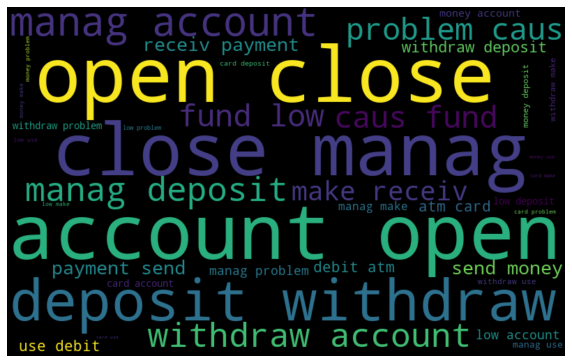

Credit card


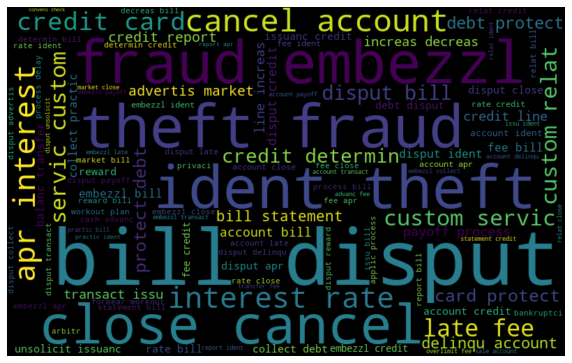

Mortgage


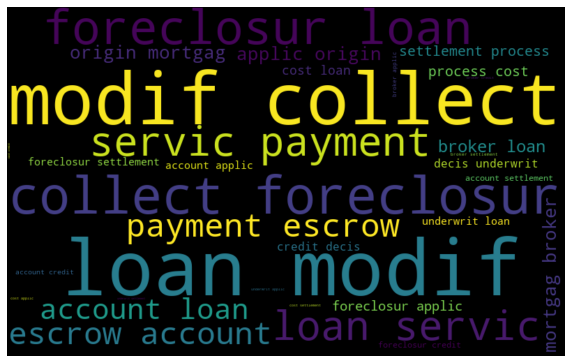

Credit reporting


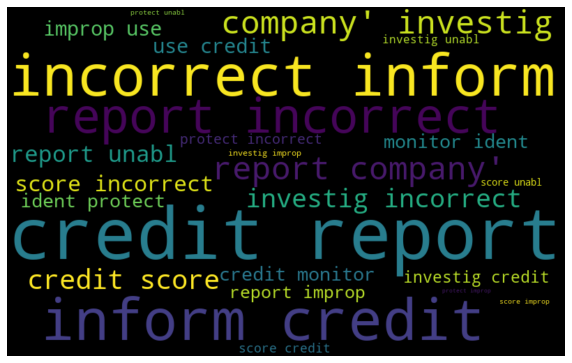

Consumer Loan


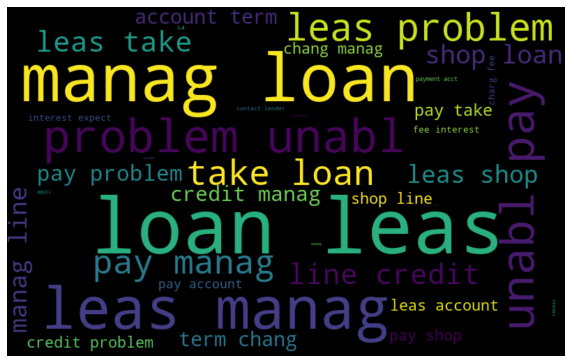

Student loan


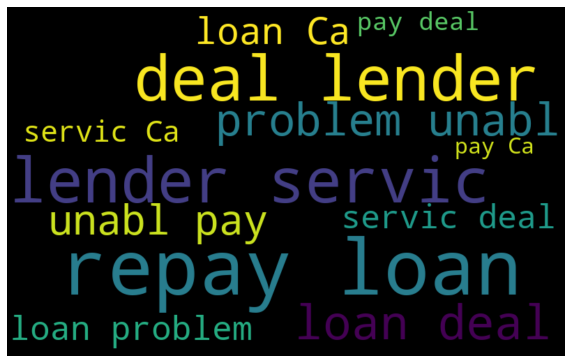

Debt collection


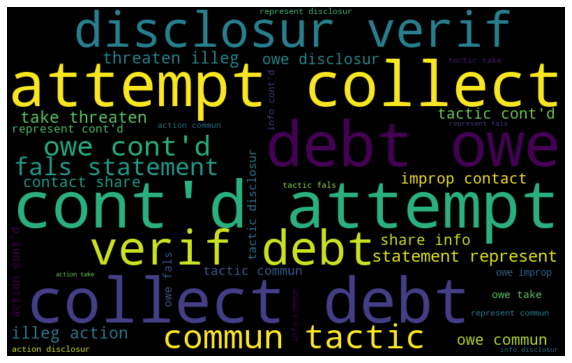

In [16]:
for product_name in df_train['Product'].unique():
    print(product_name)
    all_words = ' '.join([text for text in df_train.loc[df_train['Product'].str.contains(product_name),'Cleaned_Issue']])
    from wordcloud import WordCloud
    wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

    plt.figure(figsize=(10, 7))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.show()

# Dropping Unneccesary Columns for the Model Building¶

In [17]:
df_train.columns

Index(['Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue',
       'Consumer complaint narrative', 'Company public response', 'Company',
       'State', 'ZIP code', 'Tags', 'Consumer consent provided?',
       'Submitted via', 'Date sent to company', 'Company response to consumer',
       'Timely response?', 'Consumer disputed?', 'Complaint ID', 'Days held',
       'Year_Received', 'Month_Received', 'Day_Received', 'Year_Sent',
       'Month_Sent', 'Day_Sent', 'weekday', 'Week_Received', 'Cleaned_Issue'],
      dtype='object')

In [18]:
df_train.columns

Index(['Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue',
       'Consumer complaint narrative', 'Company public response', 'Company',
       'State', 'ZIP code', 'Tags', 'Consumer consent provided?',
       'Submitted via', 'Date sent to company', 'Company response to consumer',
       'Timely response?', 'Consumer disputed?', 'Complaint ID', 'Days held',
       'Year_Received', 'Month_Received', 'Day_Received', 'Year_Sent',
       'Month_Sent', 'Day_Sent', 'weekday', 'Week_Received', 'Cleaned_Issue'],
      dtype='object')

In [19]:
df_train.shape

(100311, 28)

In [20]:
df_train.rename(columns = {'Timely response?':'Timelyresponse',
                           'Consumer disputed?':'Consumerdisputed'}, inplace = True)

# Convert Target  Column to 0 and 1

In [21]:
df_train['Consumerdisputed'] = np.where(df_train['Consumerdisputed'] == "Yes", 1, 0)

In [22]:
#consumerdisputed featur value counts fro Yes/No i.e. 1/0
df_train.Consumerdisputed.value_counts()

0    69634
1    30677
Name: Consumerdisputed, dtype: int64

In [23]:
## Save 2nd phase of cleaned up file
#df_train.to_csv(dataFolder+"/Dataset_wrangling_Part_3_Post_Review.csv_testing",index=False)

# Creating Dummy Variables

In [24]:
df_train.columns

Index(['Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue',
       'Consumer complaint narrative', 'Company public response', 'Company',
       'State', 'ZIP code', 'Tags', 'Consumer consent provided?',
       'Submitted via', 'Date sent to company', 'Company response to consumer',
       'Timelyresponse', 'Consumerdisputed', 'Complaint ID', 'Days held',
       'Year_Received', 'Month_Received', 'Day_Received', 'Year_Sent',
       'Month_Sent', 'Day_Sent', 'weekday', 'Week_Received', 'Cleaned_Issue'],
      dtype='object')

In [25]:
#find unique products in dataset
df_train.Product.unique()

array(['Bank account or service', 'Credit card', 'Mortgage',
       'Credit reporting', 'Consumer Loan', 'Student loan',
       'Debt collection'], dtype=object)

In [26]:
#find unique Timely response in dataset
df_train.Timelyresponse.unique()

array(['Yes', 'No'], dtype=object)

In [27]:
df_train.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,...,Days held,Year_Received,Month_Received,Day_Received,Year_Sent,Month_Sent,Day_Sent,weekday,Week_Received,Cleaned_Issue
0,2015-04-26,Bank account or service,Other bank product/service,Deposits and withdrawals,Missing,RE : XXXX XXXX XXXX-PRIVILEGED AND CONFIDENTIA...,Missing,Wells Fargo & Company,GA,319XX,...,0,2015,4,26,2015,4,26,Sunday,4,deposit withdraw
1,2015-12-07,Credit card,Missing,Payoff process,Missing,Missing,Missing,Capital One,IL,60610,...,0,2015,12,7,2015,12,7,Monday,1,payoff process
2,2012-01-06,Mortgage,Conventional fixed mortgage,"Application, originator, mortgage broker",Missing,Missing,Missing,Bank of America,CA,90814,...,3,2012,1,6,2012,1,9,Friday,1,applic origin mortgag broker
3,2015-07-27,Mortgage,VA mortgage,Settlement process and costs,Missing,This is a new complaint. In the after math of ...,Company chooses not to provide a public response,Bank of America,FL,325XX,...,0,2015,7,27,2015,7,27,Monday,4,settlement process cost
4,2014-04-06,Mortgage,Conventional adjustable mortgage (ARM),"Loan modification,collection,foreclosure",Missing,Missing,Missing,Nationstar Mortgage,CO,80226,...,0,2014,4,6,2014,4,6,Sunday,1,loan modif collect foreclosur


# Converting above Categorical Values into Numerics using get_dummies() function

In [28]:
df_train.columns

Index(['Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue',
       'Consumer complaint narrative', 'Company public response', 'Company',
       'State', 'ZIP code', 'Tags', 'Consumer consent provided?',
       'Submitted via', 'Date sent to company', 'Company response to consumer',
       'Timelyresponse', 'Consumerdisputed', 'Complaint ID', 'Days held',
       'Year_Received', 'Month_Received', 'Day_Received', 'Year_Sent',
       'Month_Sent', 'Day_Sent', 'weekday', 'Week_Received', 'Cleaned_Issue'],
      dtype='object')

In [29]:
df_train.rename(columns = { 'Submitted via':'Submittedvia',
                           'Company response to consumer':'Companyresponsetoconsumer',
                           'Complaint ID':'ComplaintID',
                           }, inplace = True)

In [30]:
features_to_drop = ['Date received', 'Sub-product','Sub-issue',
       'Company public response', 'Company',
       'State', 'Tags', 'Consumer consent provided?',
       'weekday','Consumer complaint narrative',
        'ZIP code','Date sent to company'
                   ]

df_train_postclean = df_train.drop(features_to_drop, axis = 1)

In [31]:
df_train_postclean.columns

Index(['Product', 'Issue', 'Submittedvia', 'Companyresponsetoconsumer',
       'Timelyresponse', 'Consumerdisputed', 'ComplaintID', 'Days held',
       'Year_Received', 'Month_Received', 'Day_Received', 'Year_Sent',
       'Month_Sent', 'Day_Sent', 'Week_Received', 'Cleaned_Issue'],
      dtype='object')

In [32]:
features_to_drop = ['Year_Received',
                    'Day_Received'
                   ]

df_train_postclean = df_train_postclean.drop(features_to_drop, axis = 1)

In [33]:
df_train_postclean.columns

Index(['Product', 'Issue', 'Submittedvia', 'Companyresponsetoconsumer',
       'Timelyresponse', 'Consumerdisputed', 'ComplaintID', 'Days held',
       'Month_Received', 'Year_Sent', 'Month_Sent', 'Day_Sent',
       'Week_Received', 'Cleaned_Issue'],
      dtype='object')

In [34]:
#get_dummies() is used for data manipulation. It converts categorical data into dummy or indicator variables
dum_cols = ['Product', 'Submittedvia', 'Companyresponsetoconsumer', 'Timelyresponse']
df_train_dummies = pd.get_dummies(df_train[dum_cols], prefix_sep = '_', drop_first = True)
#drop_first =True (Remove first level to get k-1 dummies out of k categorical levels)

In [35]:
#first 5 rows of data set after data conversion
df_train_dummies.head()

,Product_Consumer Loan,Product_Credit card,Product_Credit reporting,Product_Debt collection,Product_Mortgage,Product_Student loan,Submittedvia_Fax,Submittedvia_Phone,Submittedvia_Postal mail,Submittedvia_Referral,Submittedvia_Web,Companyresponsetoconsumer_Closed with explanation,Companyresponsetoconsumer_Closed with monetary relief,Companyresponsetoconsumer_Closed with non-monetary relief,Companyresponsetoconsumer_Closed with relief,Companyresponsetoconsumer_Closed without relief,Timelyresponse_Yes
0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1
1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1
2,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1
3,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1
4,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1


In [36]:
df_train = df_train_postclean.drop(dum_cols, axis = 1) #Drop the Catogorical cols
df_train = pd.concat([df_train, df_train_dummies], axis = 1) #Add dummuies columns to absorb Catogorical values

# Executing TF-IDF for Text Processing

The TfidfVectorizer will tokenize documents, learn the vocabulary and inverse document frequency weightings, 
and allow you to encode new documents

In [37]:
#import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

#max_features: Build a vocabulary that only consider the top max_features ordered by term frequency across the corpus.
#min_df: Ignore terms that have a document frequency strictly lower than the below threshold
#max_df:Ignore terms that have a document frequency strictly higher than the below threshold.

vectorizer = TfidfVectorizer (max_features=200, min_df=7, max_df=0.8, stop_words=stopwords.words('english'))

In [38]:
## issues_cleaned_train is an array
issues_cleaned_train = vectorizer.fit_transform(df_train['Cleaned_Issue']).toarray()

In [39]:
# issues_cleaned_train array dimensions
issues_cleaned_train.shape[1]

118

In [40]:
#Create the Training set with issue feature, calling the column as Feature
tf_columns_train = []
for i in range(issues_cleaned_train.shape[1]):
    tf_columns_train.append('Feature' + str(i+1))
issues_train = pd.DataFrame(issues_cleaned_train, columns = tf_columns_train)



In [41]:
issues_train.head()

,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7,Feature8,Feature9,Feature10,...,Feature109,Feature110,Feature111,Feature112,Feature113,Feature114,Feature115,Feature116,Feature117,Feature118
0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.707107,0.0
1,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
2,0.0,0.0,0.0,0.0,0.497837,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
3,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
4,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0


In [42]:
df_train.columns

Index(['Issue', 'Consumerdisputed', 'ComplaintID', 'Days held',
       'Month_Received', 'Year_Sent', 'Month_Sent', 'Day_Sent',
       'Week_Received', 'Cleaned_Issue', 'Product_Consumer Loan',
       'Product_Credit card', 'Product_Credit reporting',
       'Product_Debt collection', 'Product_Mortgage', 'Product_Student loan',
       'Submittedvia_Fax', 'Submittedvia_Phone', 'Submittedvia_Postal mail',
       'Submittedvia_Referral', 'Submittedvia_Web',
       'Companyresponsetoconsumer_Closed with explanation',
       'Companyresponsetoconsumer_Closed with monetary relief',
       'Companyresponsetoconsumer_Closed with non-monetary relief',
       'Companyresponsetoconsumer_Closed with relief',
       'Companyresponsetoconsumer_Closed without relief',
       'Timelyresponse_Yes'],
      dtype='object')

In [43]:
# Drop Cleaned_Issue from train-data
df_train = df_train.drop('Cleaned_Issue', axis = 1)

## Concatenate vectorise issue and df_train
df_train = pd.concat([df_train, issues_train], axis = 1)


In [44]:
#display first 5 rows
df_train.head()

,Issue,Consumerdisputed,ComplaintID,Days held,Month_Received,Year_Sent,Month_Sent,Day_Sent,Week_Received,Product_Consumer Loan,...,Feature109,Feature110,Feature111,Feature112,Feature113,Feature114,Feature115,Feature116,Feature117,Feature118
0,Deposits and withdrawals,1,1347613,0,4,2015,4,26,4,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.707107,0.0
1,Payoff process,1,1685130,0,12,2015,12,7,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
2,"Application, originator, mortgage broker",1,10631,3,1,2012,1,9,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
3,Settlement process and costs,1,1489180,0,7,2015,7,27,4,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
4,"Loan modification,collection,foreclosure",1,795636,0,4,2014,4,6,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0


In [45]:
#data frame dimensions
df_train.shape

(100311, 144)

In [46]:
# Drop Issue from train-data which text NOT numeric - already vectorized
features_to_drop = ['Issue',
                    'Days held'
                   ]
df_train = df_train.drop(features_to_drop, axis = 1)


In [47]:
df_train.shape

(100311, 142)

In [48]:
#Call the find_missing_values_func(df)
columnsWiseMissingValue = find_missing_values_func(df_train) 
print(columnsWiseMissingValue)

Selected dataframe has 142 columns.
There are 0 columns that have missing values.
Empty DataFrame
Columns: [Missing Values, % of Total Values]
Index: []


# #saving the cleaned data to a file for further processing

In [50]:
df_train.to_csv(dataFolder+"/Output_CSV/Dataset_Step4_Processed_Data_Revised.csv",index=False)